In [ ]:
# DecisionTree Algorithm
import numpy as np
import pandas as pd
import matplotlib as plt

In [14]:
df=pd.read_csv('/content/drive/MyDrive/Rinex/fruit_data_with_colors.txt',sep='\t')
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# df=df.sample(frac=1)
# df

In [18]:
X=df.iloc[:,[4,6]].values
y=df.iloc[:,0].values

array([1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=8,test_size=0.3)

In [ ]:
y_train

array([1, 3, 4, 3, 3, 1, 3, 2, 1, 2, 1, 4, 3, 3, 1, 4, 4, 4, 3, 1, 1, 3,
       3, 3, 3, 1, 3, 1, 2, 4, 3, 4, 1, 1, 4, 1, 3, 1, 4, 3, 3])

In [ ]:
X.shape

(59, 2)

In [ ]:
X_train.shape

(41, 2)

In [ ]:
X_test.shape

(18, 2)

In [ ]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(min_samples_split=30)

In [ ]:
clf.fit(X,y)

DecisionTreeClassifier(min_samples_split=30)

In [ ]:
y_p=clf.predict(X)
print(y)
y_p

[3 2 3 3 4 3 3 4 4 3 2 2 3 1 1 3 4 1 1 1 3 4 3 4 1 1 1 1 4 3 2 3 4 1 3 4 1
 2 4 1 1 1 4 4 3 3 1 4 4 4 3 1 3 1 1 3 1 3 4]


array([3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 1, 1, 3, 4, 4, 1, 4, 3, 4,
       3, 4, 4, 1, 1, 4, 4, 4, 3, 3, 4, 4, 3, 4, 1, 3, 4, 4, 4, 1, 4, 4,
       3, 3, 1, 4, 4, 4, 3, 1, 3, 4, 1, 3, 1, 3, 4])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy_score(y_p,y)

0.7457627118644068

In [ ]:
y_pred1=clf.predict(X_test)
y_pred1

array([3, 4, 1, 1, 4, 4, 4, 4, 3, 1, 4, 4, 3, 3, 4, 4, 3, 1])

In [ ]:
y_test

array([2, 4, 1, 1, 4, 4, 4, 4, 3, 1, 1, 4, 2, 3, 4, 1, 3, 1])

In [ ]:
accuracy_score(y_pred1,y_test)

0.7777777777777778

In [ ]:
confusion_matrix(y_pred1,y_test)

array([[4, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 2, 3, 0],
       [2, 0, 0, 7]])

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         6
           2       0.00      0.00      0.00         2
           3       0.60      1.00      0.75         3
           4       0.78      1.00      0.88         7

    accuracy                           0.78        18
   macro avg       0.59      0.67      0.61        18
weighted avg       0.74      0.78      0.73        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


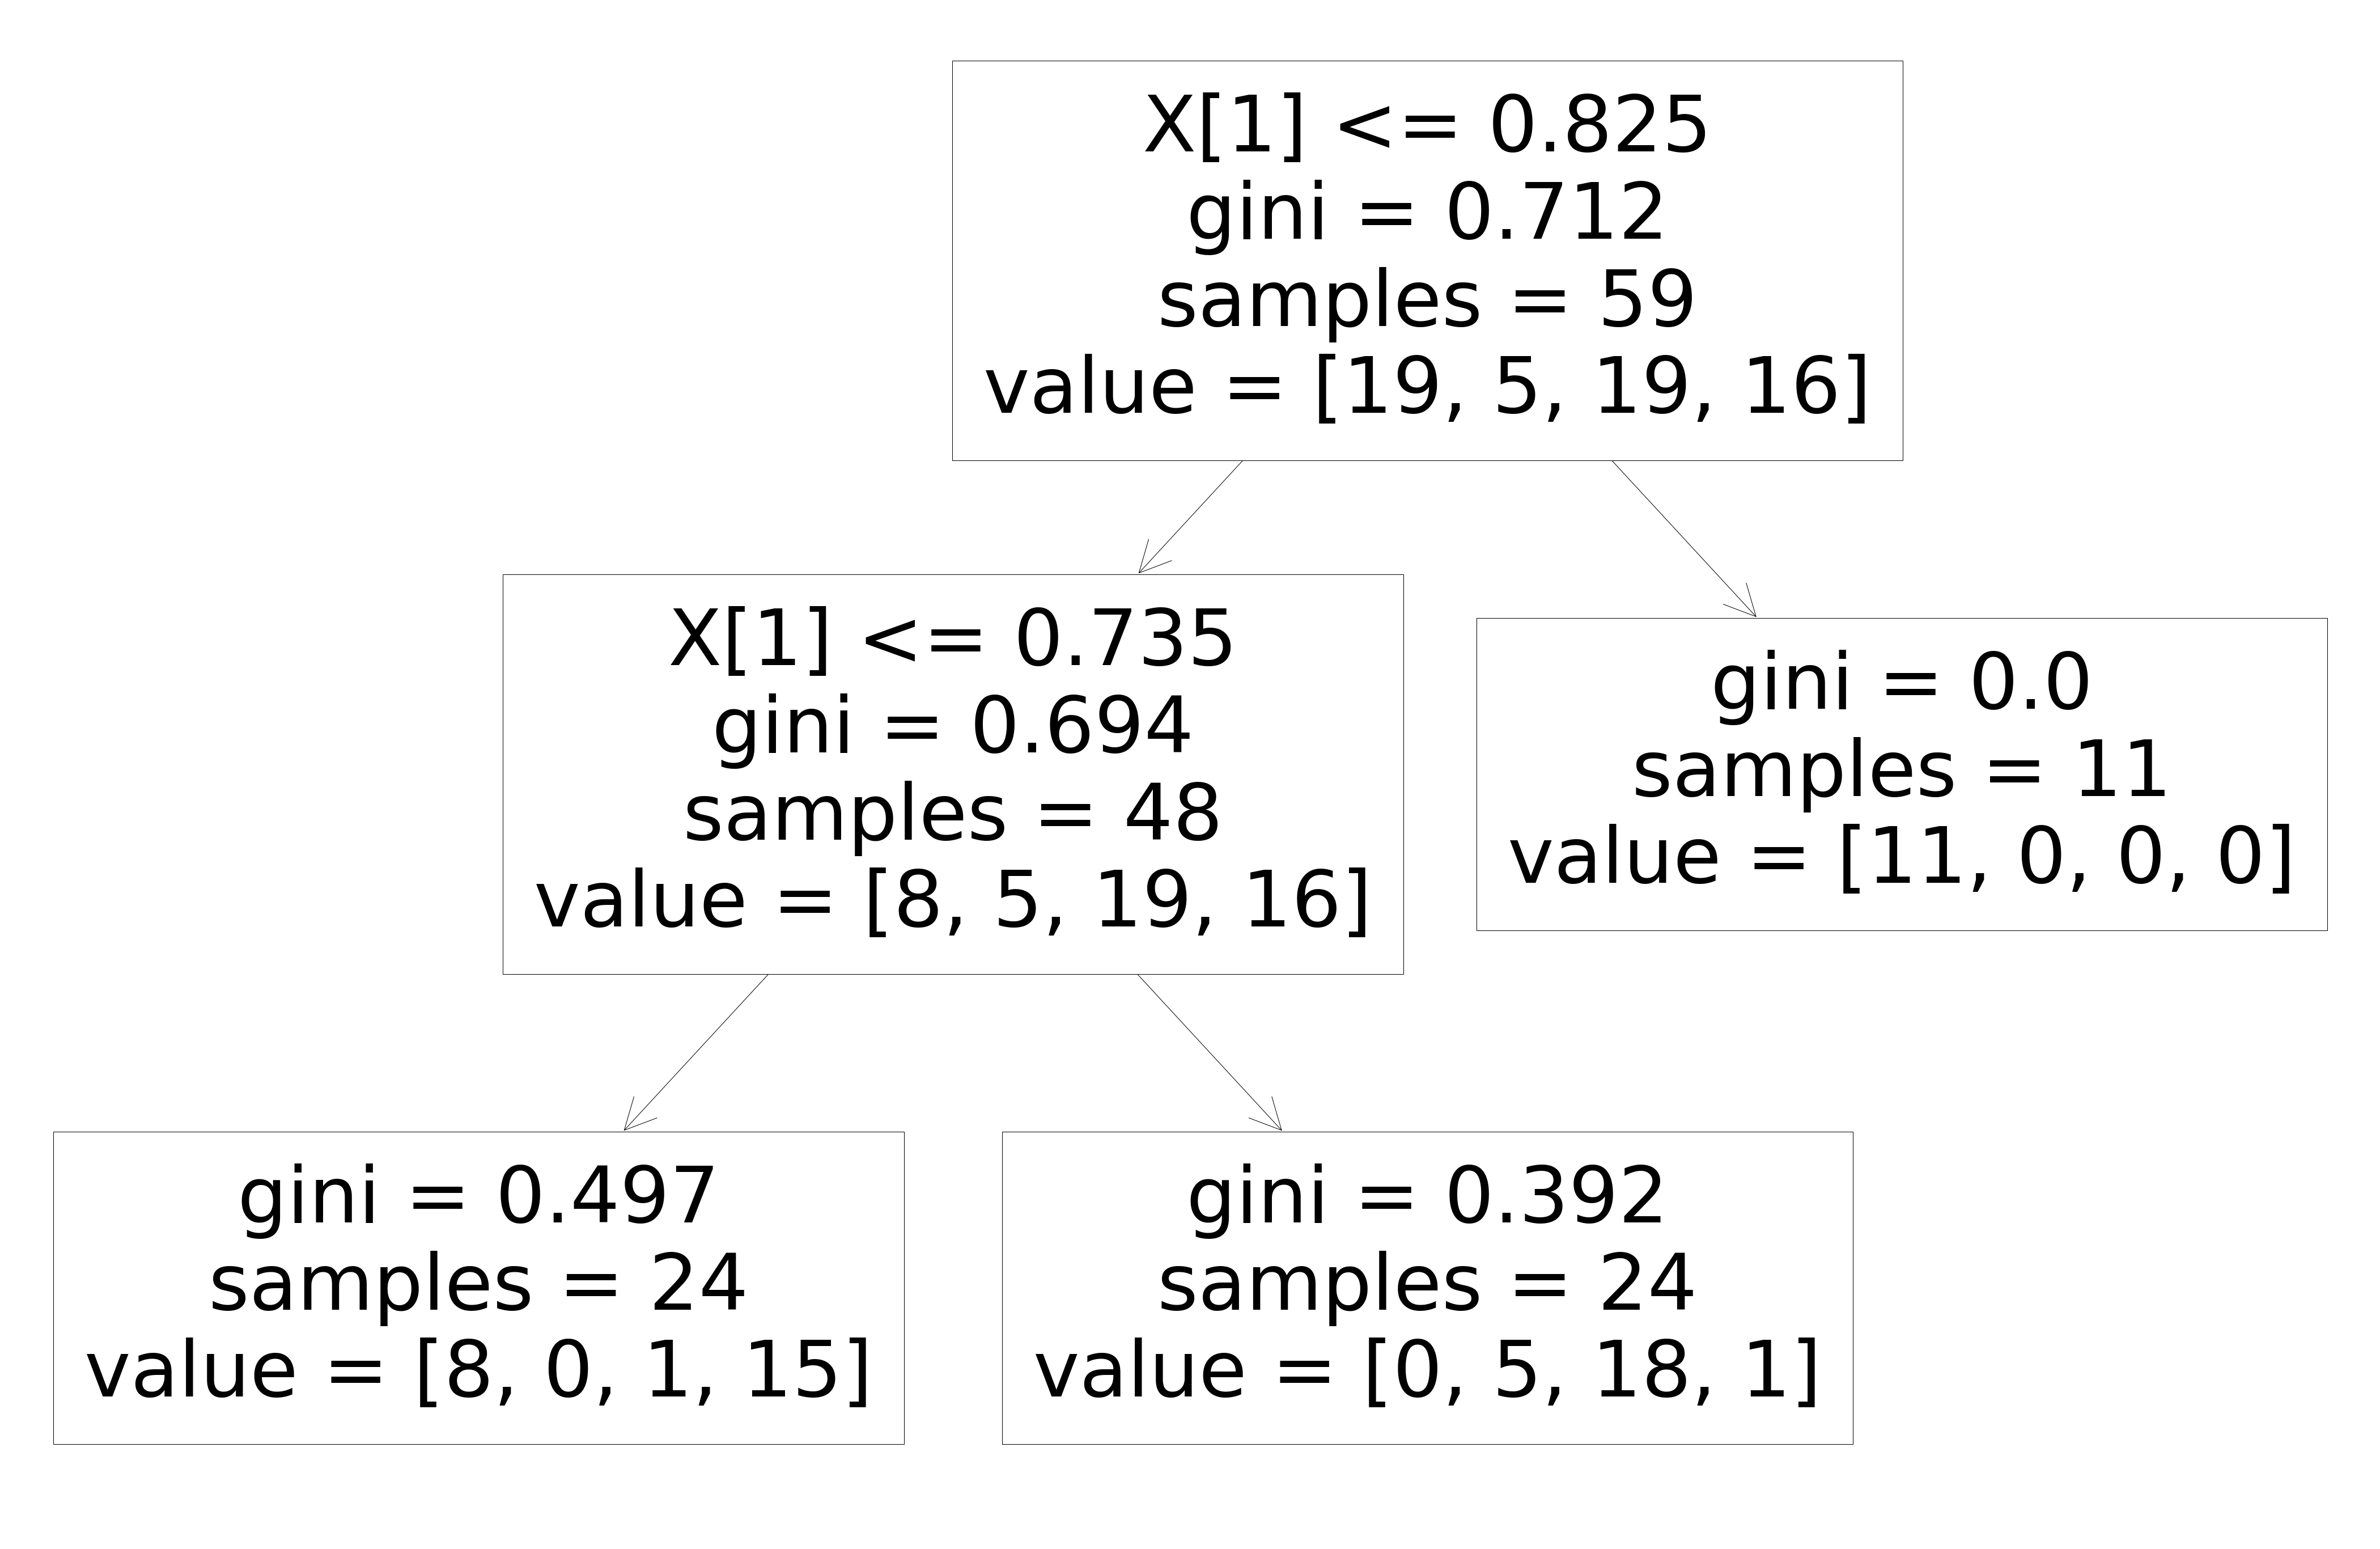

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=75,50
plot_tree(clf)
plt.show()